In [51]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np


In [52]:
population_size = 1000

graph = nx.Graph()  # Create an empty graph

# Add nodes to the graph representing individuals
graph.add_nodes_from(range(population_size))

In [53]:
# randomly assign strategies to the individuals (even distribution)
strategies = ["UI"] * (population_size // 4) + ["TI"] * (population_size // 4) + ["TR"] * (population_size // 4) + ["UR"] * (population_size // 4)
random.shuffle(strategies)

# assign strategies to the nodes in the graph
for node, strategy in zip(graph.nodes, strategies):
    graph.nodes[node]["strategy"] = str(strategy)


# assign initial payoffs 
for node in graph.nodes:
    graph.nodes[node]["payoff"] = 0

# create edges between all nodes
for node1 in graph.nodes:
    for node2 in graph.nodes:
        if node1 != node2:
            graph.add_edge(node1, node2)



In [54]:
# define the payoff matrix
R = 5
B = 3
L = 5
N = 1
S = 1

# trustworthy initiator, trustworthy recipient, untrustworthy initiator, untrustworthy recipient

payoff_matrix = {
    ("TI", "TR"): (R, R),
    ("TR", "UI"): (-L, R+B),
    ("TI", "UR"): (-N-S, -N),
    ("UI", "UR"): (-N, -N),
}

print(payoff_matrix)


{('TI', 'TR'): (5, 5), ('TR', 'UI'): (-5, 8), ('TI', 'UR'): (-2, -1), ('UI', 'UR'): (-1, -1)}


In [55]:
# simulate the game dynamics for 10 rounds

for x in range(10):
    # iterate over edgges in graph & calculate the payoffs for each pairwise interaction based on the strategies in the payoff matrix

    for edge in graph.edges:
        node1, node2 = edge

        # Get the strategies of the interacting nodes
        strategy1 = graph.nodes[node1]["strategy"]
        strategy2 = graph.nodes[node2]["strategy"]

        # sort the strategies alphabetically
        sorted_strategies = sorted([strategy1, strategy2])

        # get the corresponding payoffs from the payoff matrix
        if (sorted_strategies[0], sorted_strategies[1]) not in payoff_matrix:
            continue
        
        payoff1, payoff2 = payoff_matrix[(sorted_strategies[0], sorted_strategies[1])]

        # update the payoffs of the nodes
        graph.nodes[node1]["payoff"] += payoff1
        graph.nodes[node2]["payoff"] += payoff2

    # update the strategies of the nodes based on their payoffs
    total_payoff = sum([graph.nodes[node]["payoff"] for node in graph.nodes])

    if population_size == 0:
        average_payoff = 0
    else:
        average_payoff = total_payoff / population_size

    for node in graph.nodes:
        # get current strategy of the node
        current_strategy = graph.nodes[node]["strategy"]

        # get the payoff of the node
        node_payoff = graph.nodes[node]["payoff"]

        # calculate the fitess of the current strategy
        if average_payoff == 0:
            fitness = 0
        else:
            fitness = node_payoff / average_payoff

        # update strategy based on neighboring nodes 
        new_strategy = current_strategy # initialize with current strategy

        for neighbor in graph.neighbors(node):
            # get payoff of neighbor
            neighbor_payoff = graph.nodes[neighbor]["payoff"]

            # get strategy of neighbor
            neighbor_strategy = graph.nodes[neighbor]["strategy"]

            # if TI-UI, change them to whichever payoff is higher
            if current_strategy == "TI" and neighbor_strategy == "UI":
                if node_payoff > neighbor_payoff:
                    new_strategy = current_strategy
                else:
                    new_strategy = neighbor_strategy
            
            # if TR-UR, change them to whichever payoff is higher
            if current_strategy == "TR" and neighbor_strategy == "UR":
                if node_payoff > neighbor_payoff:
                    new_strategy = current_strategy
                else:
                    new_strategy = neighbor_strategy

            # # calculate fitness of neighboring strategy 
            # neighbor_fitness = neighbor_payoff / average_payoff

            # # if the neighboring strategy is more fit than the current strategy, update the current strategy
            # if neighbor_fitness > fitness:
            #     new_strategy = graph.nodes[neighbor]["strategy"]
            #     fitness = neighbor_fitness
        
        # update the strategy of the node
        graph.nodes[node]["strategy"] = new_strategy

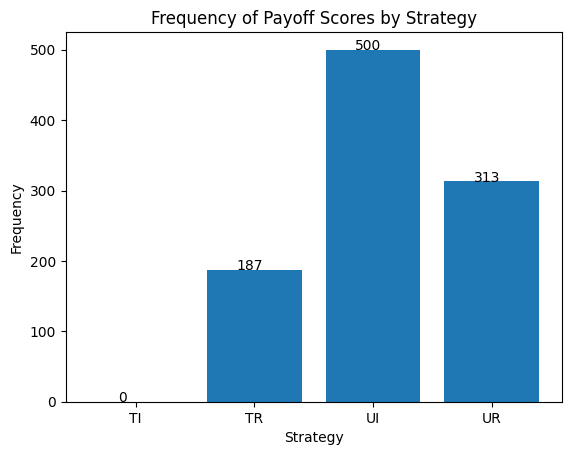

In [56]:
# Extract strategies and payoff scores from the graph nodes
strategies = [graph.nodes[node]["strategy"] for node in graph.nodes]
payoff_scores = [graph.nodes[node]["payoff"] for node in graph.nodes]

# Bin the payoff scores based on strategy using numpy
strategy_bins = np.unique(["TI", "UI", "TR", "UR"])
binned_scores = [np.array(payoff_scores)[np.array(strategies) == strategy] for strategy in strategy_bins]

# Calculate the frequencies for each strategy
frequencies = [len(scores) for scores in binned_scores]

# Create a bar plot
plt.bar(strategy_bins, frequencies)

# display the values above each bar
for i, v in enumerate(frequencies):
    plt.text(i - 0.15, v + 0.01, str(v))

# Add labels and title
plt.xlabel("Strategy")
plt.ylabel("Frequency")
plt.title("Frequency of Payoff Scores by Strategy")

# Display the plot
plt.show()